Mini Project 2 : 

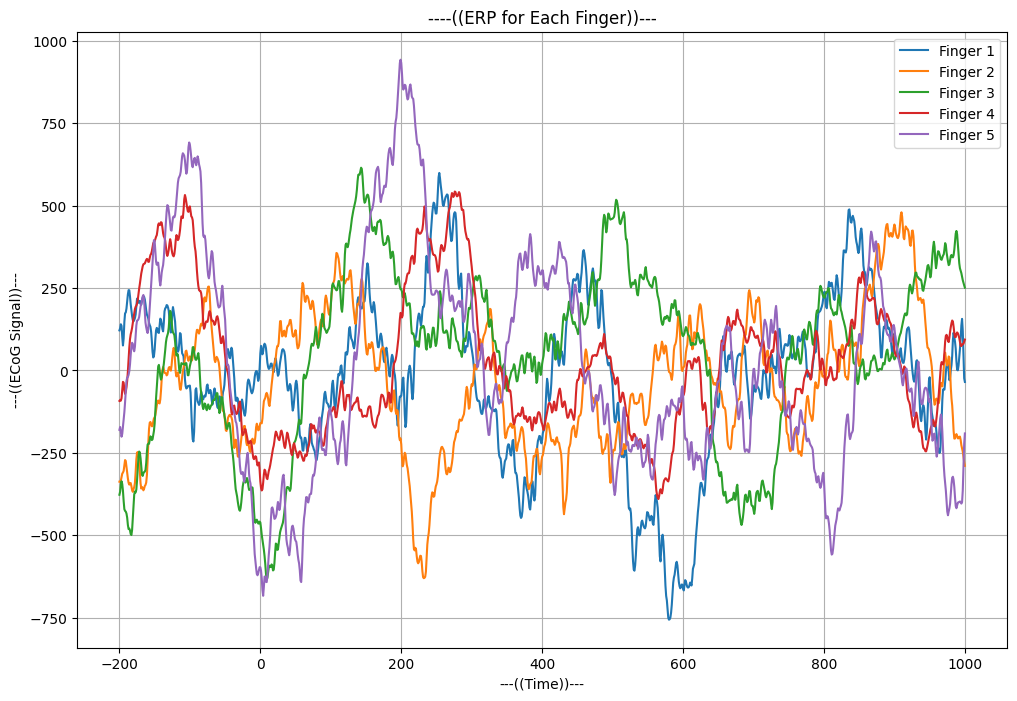

The final MATRIX:
[[ 121.5859375   128.078125    140.1796875  ...   42.8125
   -23.765625    -34.859375  ]
 [-337.725      -338.28333333 -334.625      ... -263.21666667
  -278.08333333 -289.5       ]
 [-377.33333333 -367.99166667 -346.64166667 ...  265.88333333
   258.375       251.18333333]
 [ -92.44736842  -89.54210526  -91.61578947 ...   81.10526316
    87.2          93.63684211]
 [-180.35135135 -171.59459459 -185.48648649 ... -294.05405405
  -222.86486486 -191.21621622]]


In [ ]:
# אלה הספריות שהשתמשתי בהן 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


def calc_mean_erp(trial_points, ecog_data):
    try:
# הפונקציה הזו טטעון את הקובץ נתונים שנשתמש בו
        trial_points_arg=pd.read_csv(trial_points, header=None) 
# הפונקציה הזו תשנה את השמות של העמודים 
        trial_points_arg.rename(columns={0: 'start', 1: 'peak', 2: 'finger'}, inplace=True) 
#שיניתי את כל הערכים למספרים שלמים int  על ידי הפונקציה הזו 
        trial_points_arg=trial_points_arg.astype(int) 

# בשביל להפוך את הנתונים לרשימה אחד ארוכה השתמשתי בפונקיה שיש לה פעולת השטחה
        ecog_data_arg=pd.read_csv(ecog_data, header=None).to_numpy().flatten() 
# פרמטרים של זמן :
        moves = {"before": 200, "after": 1000}
        # המספר הכולל של הדגימות:
        total = moves["before"] + moves["after"]  
        total = total + 1 
        fiv = 5  
        # מטריצה בגודל (5, total) שמלאה בערכים 1
        fingers_erp_mean = np.ones((fiv, total))  
        # מטריצה שמלאה בערכים 0
        fingers_erp_mean = fingers_erp_mean * 0  
        

# מה הקוד עושה?
#הקוד עובר דרך כל אחת מהאצבעות (מ-1 עד 5), מסנן את הטריילים (trials) הרלוונטיים לכל אצבע מתוך trial_points_arg, ובודק אם ניתן לחלץ מקטעי ERP (Event-Related Potential) מתוך הנתונים ecog_data_arg.
#אם הטריילים עומדים בתנאים מסוימים (נמצאים בטווח הנתונים), הקוד שומר את המקטעים הללו ברשימה erp_segments.


        finger_id = 1
        while finger_id<fiv or finger_id==fiv: #loop through each finger (1 to 5)
            fingerTrials=trial_points_arg[trial_points_arg['finger'].eq(finger_id)].reset_index(drop=True)
            erp_segments=[]

            if not fingerTrials.empty:
                itrt= iter(range(len(fingerTrials)))
                try:
                    while True:
                        idx=next(itrt)
                        trial=fingerTrials.iloc[idx]
                        if 0<trial['start']-moves["before"]<len(ecog_data_arg): #I check if the end and the start in the bounds
                            if trial['start']+moves["after"] < len(ecog_data_arg): #if yes append the segment for the trial
                                erp_segments.append(ecog_data_arg[trial['start']-moves["before"]:trial['start']+moves["after"] + 1])
                except StopIteration:
                    pass

#הסבר על הקוד:
#הקוד בודק אם קיימים "erp_segments" (שגויים או לא תקפים).
#  אם הם לא קיימים (כלומר הרשימה ריקה), יוצגת הודעה שמדווחת שאין ניסויים לאצבע הזו.
#אם קיימים ערכים ב-erp_segments, הקוד מחשב את ממוצע ה-ERP (התגובה החשמלית המוחית) עבור האצבע הנוכחית. הוא עושה זאת על ידי חיבור כל הערכים ב-erp_segments (באורך של פרק זמן או תווך זמן נתון), ואז מחלק את הסכום במספר הסגמנטים כדי לקבל ממוצע.
#אחרי כל אצבע, המזהה שלה (finger_id) עולה ב-1 כדי לעבור לאצבע הבאה.

            if not erp_segments: #if there is no valid trails were found
                print(f"Sorry! There id NO trials for this finger.")
            else:
                fingers_erp_mean[finger_id-1]=np.sum(erp_segments, axis=0)/len(erp_segments) 

            finger_id+=1


      
        plt.figure(figsize=(12, 8)) #I plot the ERP results
        for finggger in range(5):
            plt.plot(np.arange(-moves["before"], moves["after"] + 1), fingers_erp_mean[finggger], 
                     label=f'Finger {finggger + 1}')

        plt.xlabel('---((Time))---')
        plt.ylabel('---((ECoG Signal))---')
        plt.title('----((ERP for Each Finger))---')
        plt.legend()
        plt.grid()
        plt.show()

# אני מדפיסה את התוצאה 
        print("The final MATRIX:") 
        print(fingers_erp_mean)
        return fingers_erp_mean

    except Exception as e:
        print(f"There is some error:/ {e}")




trial_points = 'events_file_ordered.csv'
ecog_data = 'brain_data_channel_one.csv'
fingers_erp_mean = calc_mean_erp(trial_points, ecog_data)
